# PROJECT :  FLOWER CLASSIFICATION

In [26]:
# import the packages

import numpy as np
import matplotlib.pyplot as plt
import keras
from skimage import io
import os
import glob
import random
import six

from skimage.morphology import binary_dilation , binary_erosion , binary_opening , binary_closing
from skimage.morphology import selem
from skimage import transform as tf

from keras.models import Model
from keras.layers import Input , Activation , Dense , Flatten
from keras.layers.convolutional import Conv2D , MaxPooling2D , AveragePooling2D
from keras.layers.merge import add
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
from keras import backend as k

In [2]:
# Function for ploting the images

def plot_image(images , captions = None , cmap = None):
    f , axes = plt.subplots(1 , len(images) , sharey = True)
    f.set_figwidth(15)
    
    for ax , images in zip(axes , images):
        ax.imshow(images , cmap)

## Image Augmentation and Preprocessing

#### Load the dataset

In [3]:
dataset = "./flowers"
flowers_cls = ['daisy' , 'dandelion' , 'rose' , 'sunflower' , 'tulip']

In [4]:
flowers_cls

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [5]:
# Now using GLOB find out the all images from it's path

flower_path = os.path.join(dataset , flowers_cls[1] , '*')
print(flower_path)

./flowers\dandelion\*


In [6]:
flower_path = glob.glob(flower_path)
print(flower_path[3])

./flowers\dandelion\10437652486_aa86c14985.jpg


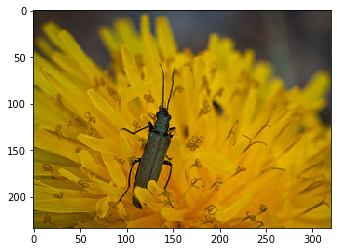

In [7]:
rand_index = random.randint(0 , len(flower_path))
image = io.imread(flower_path[rand_index])
plt.imshow(image)

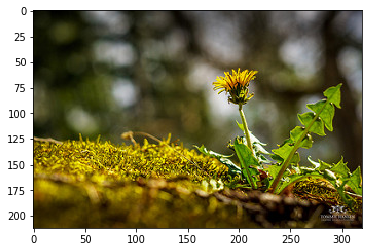

In [8]:
flower_path = os.path.join(dataset , flowers_cls[1] , '*')
flower_path = glob.glob(flower_path)

image = io.imread(flower_path[111])
plt.imshow(image)

In [9]:
image.shape

(212, 320, 3)

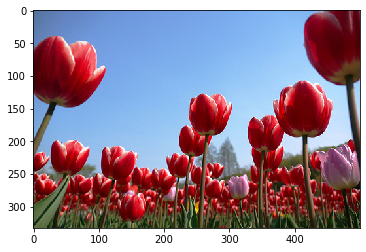

In [10]:
flower_path = os.path.join(dataset , flowers_cls[4] , '*')
flower_path = glob.glob(flower_path)

image = io.imread(flower_path[111])
plt.imshow(image)

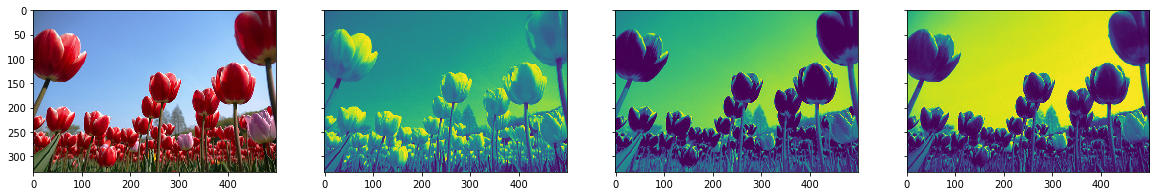

In [11]:
# ploting original image with RGB color

f , (ax1 , ax2 , ax3 , ax4) = plt.subplots(1 , 4 , sharey = True)
f.set_figwidth(20)

ax1.imshow(image)
ax2.imshow(image[: , : , 0])
ax3.imshow(image[: , : , 1])
ax4.imshow(image[: , : , 2])

## Morphological Transformation

### Thresholding

Set a value and convert all the pixels to 1 above that value, and convert 0 which are less than the value.

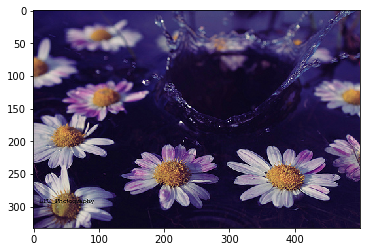

In [12]:
flower_path = os.path.join(dataset , flowers_cls[0] , '*')
flower_path = glob.glob(flower_path)

image = io.imread(flower_path[3])
plt.imshow(image)

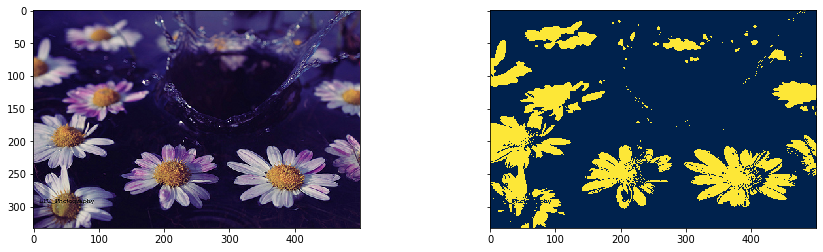

In [13]:
binary_image = image[: , : , 0] > 125
plot_image([image , binary_image] , cmap = 'cividis')

### Erosion , Dilation , Opening , Closing

In [14]:
selem = selem.disk(5)

OPENING is mainly erosion followed by dilation, it remove the small bright spots and connect the small dark spots

CLOSING is opposite of OPENING.It can remove the small dark spots and connect white or bright spots.

In [15]:
open_img = binary_opening(binary_image , selem)
close_img = binary_closing(binary_image , selem)

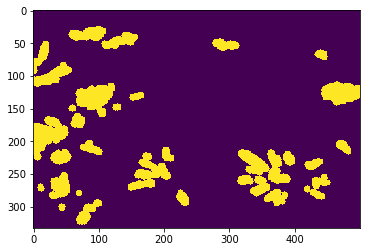

In [16]:
plt.imshow(open_img)

EROSION manily decrease the bright regions.

DILATION is opposite.It shrinks the dark regions.

In [17]:
erod_img = binary_erosion(binary_image , selem)
dilt_img = binary_dilation(binary_image , selem)

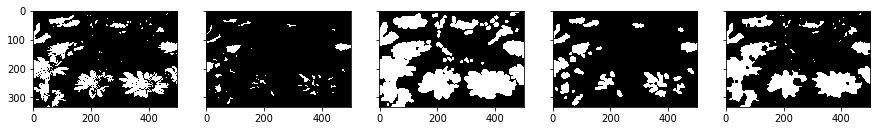

In [18]:
plot_image([binary_image , erod_img  , dilt_img , open_img , close_img] , cmap = 'gray')

## Normalization

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


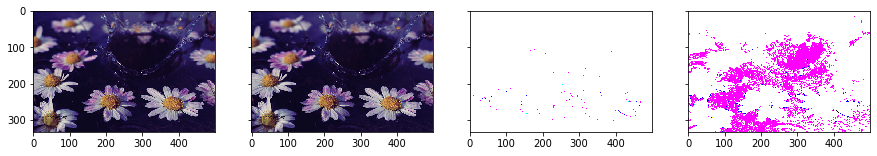

In [19]:
normal_image = image / 255
normal_image2 = image - np.min(image) / np.max(image) - np.min(image)
percentile_image = image - np.percentile(image , 5) / np.percentile(image , 95) - np.percentile(image , 5)

plot_image([image , normal_image , normal_image2 , percentile_image] , cmap = 'bwr')

## Augmentation

Augmentation is done when the quantity of the data is not sufficient.In this project image is not that much for better training.So we need to increase the number of images.Augmentation is increased the number of image by doing Rotation , Enhancing , Flipping , Cropping , Translation , Adding-Noise etc.

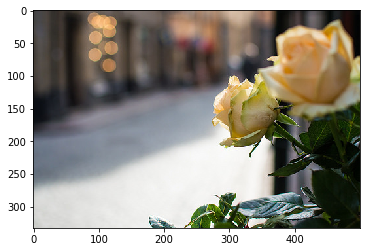

In [20]:
flower_path = os.path.join(dataset , flowers_cls[2] , '*')
flower_path = glob.glob(flower_path)

image = io.imread(flower_path[31])
plt.imshow(image)

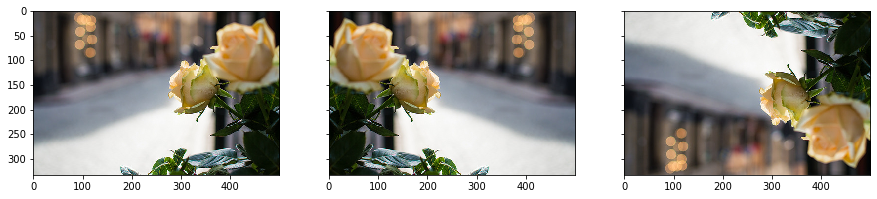

In [21]:
image_flipr = np.fliplr(image)
image_flipd = np.flipud(image)

plot_image([image , image_flipr , image_flipd] , cmap = 'bwr')

In [22]:
## Shifting the image
shift_x , shift_y = image.shape[0]/2 , image.shape[1]/2


## Translation the image
matrix_topleft = tf.SimilarityTransform(translation = [-shift_x , -shift_y])
matrix_center = tf.SimilarityTransform(translation = [shift_x , shift_y])


## Rotate the image
rotate_transform = tf.AffineTransform(rotation = np.deg2rad(45))
rotate_matrix = matrix_topleft + rotate_transform + matrix_center
rotate_image = tf.warp(image , rotate_matrix)


## Scaling the image
scale_transformation = tf.AffineTransform(scale = (2 , 2))
scale_matrix = matrix_topleft + scale_transformation + matrix_center
scale_zoom_out = tf.warp(image , scale_matrix)

scale_transformation = tf.AffineTransform(scale = (0.5 , 0.5))
scale_matrix = matrix_topleft + scale_transformation + matrix_center
scale_zoom_in = tf.warp(image , scale_matrix)


## translation the image
translate_transformation = tf.AffineTransform(translation = (50 , 50))
translate_image = tf.warp(image , translate_transformation)

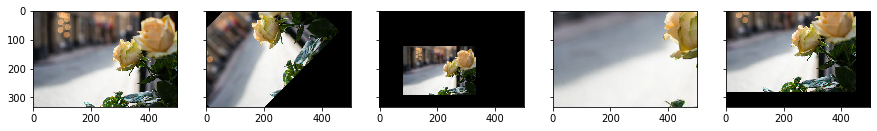

In [23]:
plot_image([image , rotate_image , scale_zoom_out , scale_zoom_in , translate_image] , cmap = 'cividis')

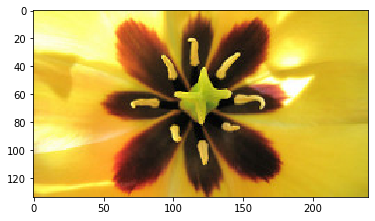

In [24]:
flower_path = os.path.join(dataset , flowers_cls[4] , '*')
flower_path = glob.glob(flower_path)

image = io.imread(flower_path[444])
plt.imshow(image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


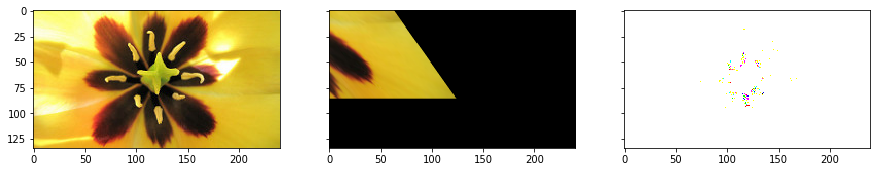

In [25]:
## Adding some Noise to the image

shear_transform = tf.AffineTransform(shear = np.deg2rad(45))
shear_matrix = matrix_topleft + shear_transform + matrix_center
shear_image = tf.warp(image , shear_matrix)

bright_filter = image * 0.999 + np.zeros_like(image) * 0.001

plot_image([image , shear_image , bright_filter])

## Building the Model.